## The SHAP Values with More Charts

* Please read [Explain your model with the SHAP values](https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d) and [The SHAP with More Elegant Charts](https://dataman-ai.medium.com/the-shap-with-more-elegant-charts-bc3e73fa1c0c)
### Table of Contents
* [Section 1: Global interpretability](#section1)
    * [Section 1.1: Bar plot](#section11)
    * [Section 1.2: Cohort plot](sSection12)
    * [Section 1.3: Heatmap plot](sSection13)
* [Section 2: Local interpretability](#section2)
    * [Section 2.1: Waterfall plot](#section21)
    * [Section 2.2: Bar plot](#section22)
    * [Section 2.3: Force plot](#section23)
    * [Section 2.4: Decision plot](#section24)
* [Section 3: How to customize SHAP plots](#section3)
    * [Section 3.1: Legend, fontsize, etc.](#section31)
    * [Section 3.2: Subplots](#section32)
* [Section 4: The SHAP Plots for a Multiclass model](#section4)
    * [Section 4.1: Global interpretability](#section41)
    * [Section 4.2: Local interpretability](#section42)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/winequality-red.csv')

In [2]:
df.shape

(1599, 12)

In [3]:
df['quality'] = df['quality'].astype(int)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<AxesSubplot:>

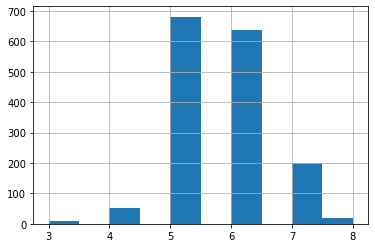

In [4]:
df['quality'].hist()

In [5]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
            'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
Y = df['quality']
X =  df[features]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1234)
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method=None, validate_parameters=False, verbosity=None)

In [6]:
X_test.shape

(320, 11)

In [7]:
X_train.shape

(1279, 11)

## (1) Global Interpretability <a class="anchor" id="section1"></a>

In [8]:
import shap
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)

### (1.1) Bar plot <a class="anchor" id="section11"></a>

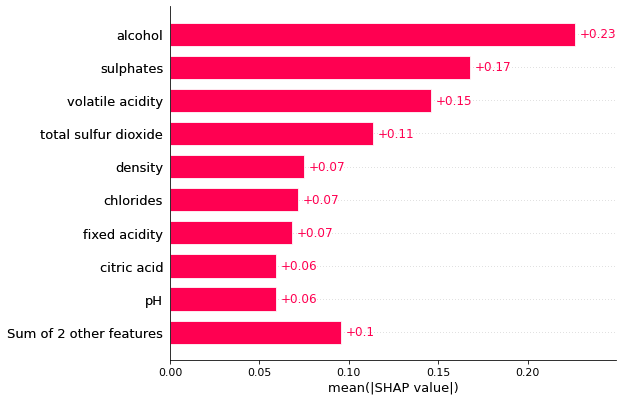

In [9]:
shap.plots.bar(shap_values, max_display=10) # default is max_display=12

### (1.2) Cohort plot  <a class="anchor" id="section12"></a>
- Create a set of cohorts
- Explanation.cohorts(N) can create N cohorts that optimally separate the SHAP values of the instances using a sklearn DecisionTreeRegressor. 
- Below shap_values.cohorts(2) creates two cohorts. 'Alcohol' is cut at 11.25. The number in brackets is the number of instances in each cohort.

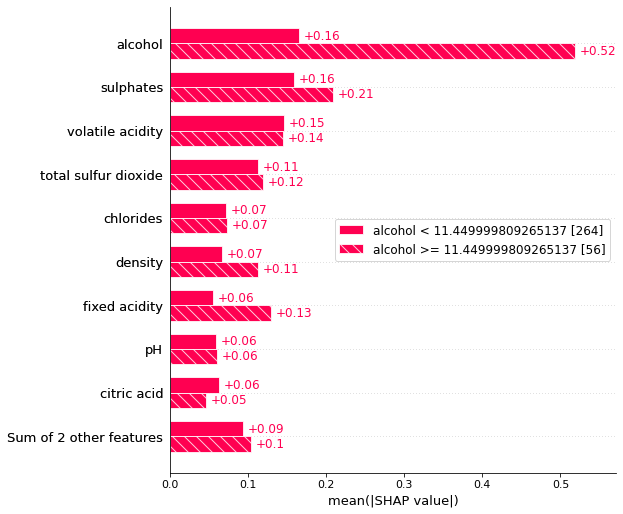

In [10]:
shap.plots.bar(shap_values.cohorts(2).abs.mean(0))

### (1.3) Heatmap  <a class="anchor" id="section13"></a>

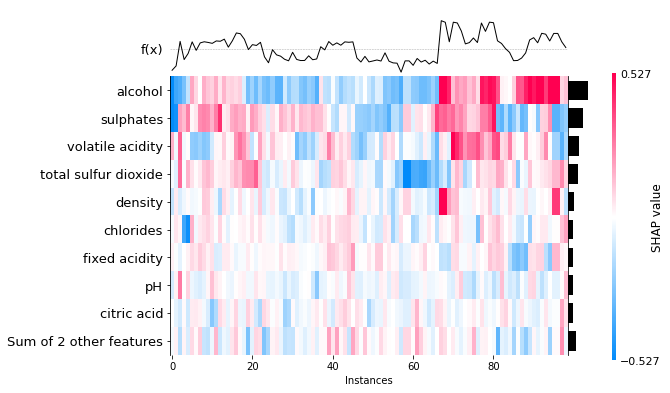

In [11]:
shap.plots.heatmap(shap_values[1:100])

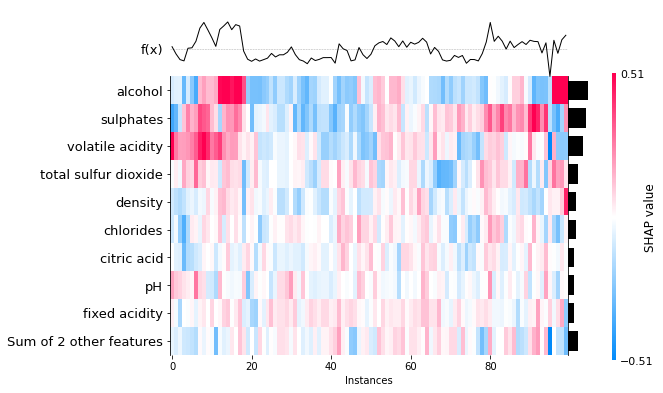

In [12]:
shap.plots.heatmap(shap_values[200:300])

## (2) Local interpretability  <a class="anchor" id="section2"></a>

### (2.1) Waterfall plot  <a class="anchor" id="section21"></a>

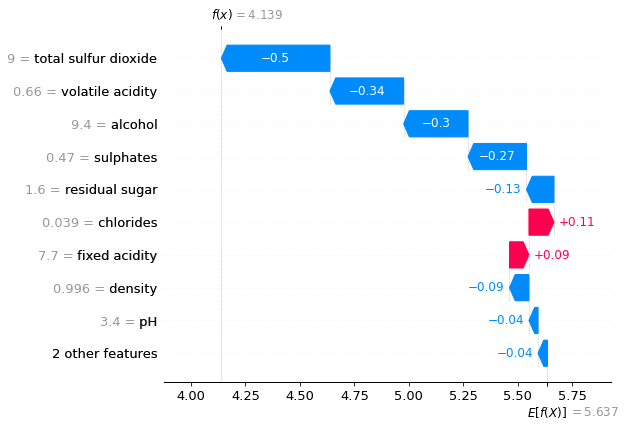

In [13]:
shap.plots.waterfall(shap_values[0]) # For the first observation

In [14]:
5.637 - 0.04 - 0.04 - 0.09 + 0.09 + 0.11 - 0.13 - 0.27 - 0.3 - 0.34 - 0.5

4.127

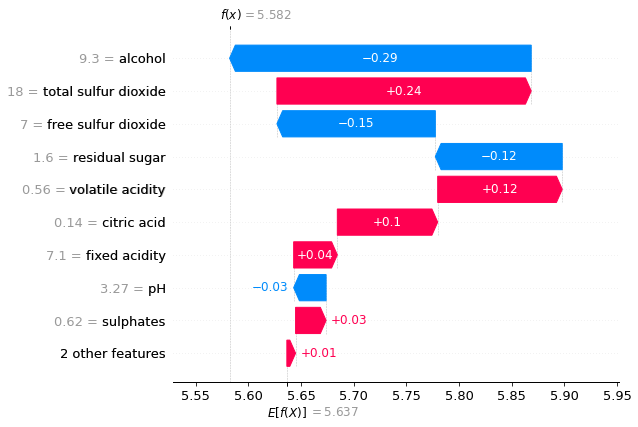

In [15]:
shap.plots.waterfall(shap_values[1]) # For the second observation

### (2.2) Bar plot <a class="anchor" id="section22"></a>

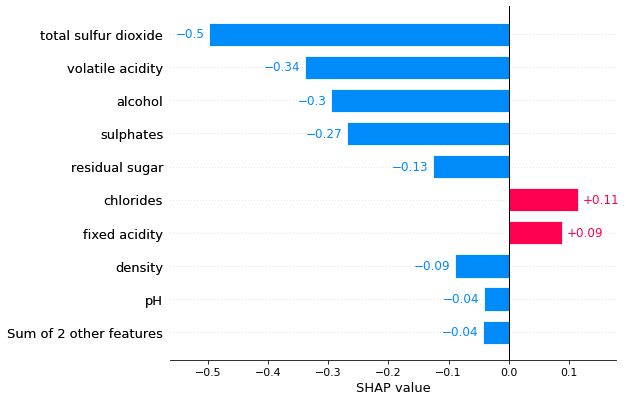

In [16]:
shap.plots.bar(shap_values[0]) # For the first observation

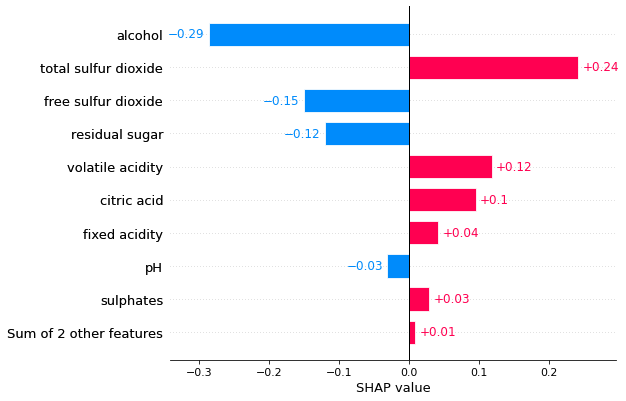

In [17]:
shap.plots.bar(shap_values[1]) # For the second observation

### (2.3) Force plot  <a class="anchor" id="section23"></a>

In [18]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)
def p(j):
    return(shap.force_plot(explainer.expected_value, shap_values[j,:], X_test.iloc[j,:]))
p(0)

In [19]:
p(1)

### (2.4) Decision plot  <a class="anchor" id="section24"></a>

The final prediction is  4.1391783


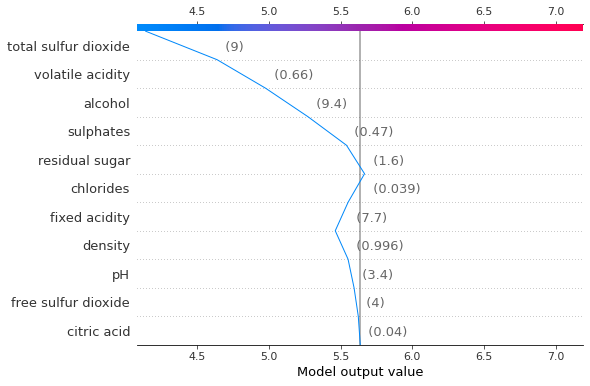

In [20]:
expected_value = explainer.expected_value
#print("The expected value is ", expected_value)
print("The final prediction is ", xgb_model.predict(X_test)[0])
shap_values = explainer.shap_values(X_test)[0]
shap.decision_plot(expected_value, shap_values, X_test)

The final prediction is  5.5821166


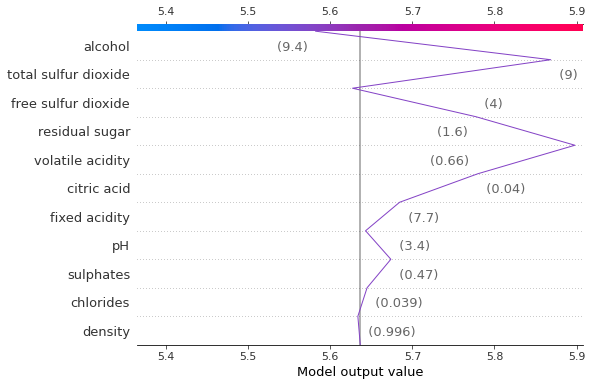

In [21]:
shap_values = explainer.shap_values(X_test)[1]
#print("The expected value is ", expected_value)
print("The final prediction is ", xgb_model.predict(X_test)[1])
shap.decision_plot(expected_value, shap_values, X_test)

## (3) How to customize the SHAP Plots <a class="anchor" id="section3"></a>
### (3.1) Legend, fontsize, etc.  <a class="anchor" id="section31"></a>

The bbox_to_anchor keyword gives a great degree of control for manual legend placement. For example, if you want your axes legend located at the figure's top right-hand corner instead of the axes' corner, simply specify the corner's location and the coordinate system of that location:
https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html

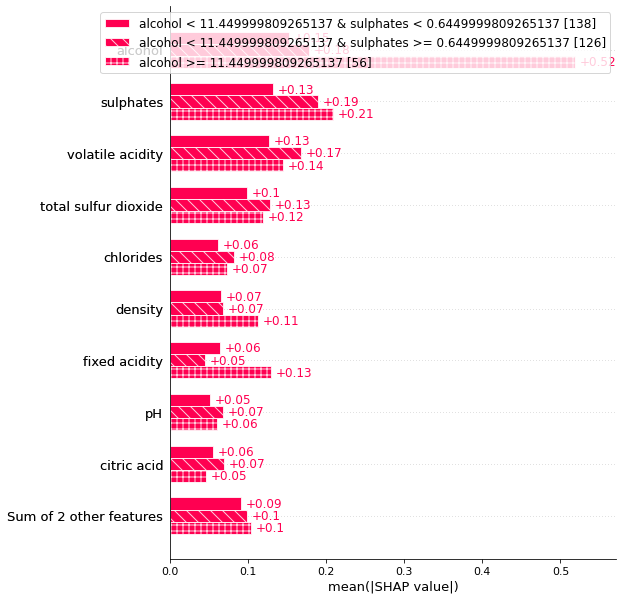

In [22]:
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)
shap.plots.bar(shap_values.cohorts(3).abs.mean(0))

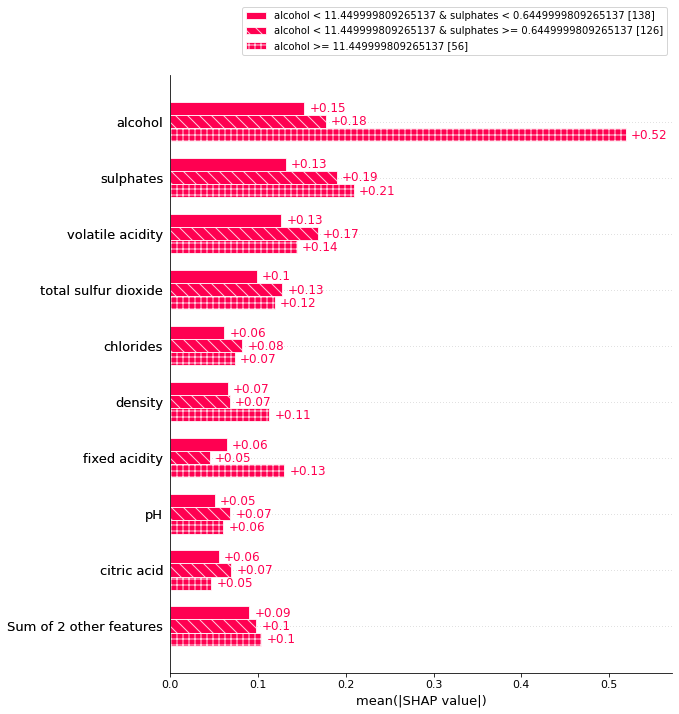

In [23]:
shap.plots.bar(shap_values.cohorts(3).abs.mean(0),
               show=False)
fig = plt.gcf() # gcf means "get current figure"
fig.set_figheight(11)
fig.set_figwidth(9)
#plt.rcParams['font.size'] = '12'
ax = plt.gca() #gca means "get current axes"
leg = ax.legend(bbox_to_anchor=(0., 1.02, 1., .102))
for l in leg.get_texts(): l.set_text(l.get_text().replace('Class', 'Klasse'))
plt.show()

### (3.2) Subplots  <a class="anchor" id="section32"></a>

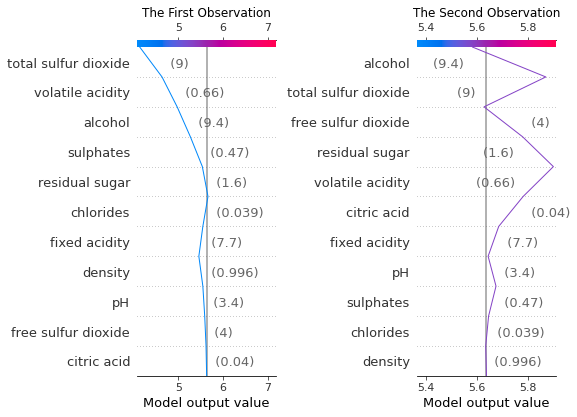

In [24]:
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(121)
shap_values = explainer.shap_values(X_test)[0]
shap.decision_plot(expected_value, shap_values, X_test, show=False)
ax1.title.set_text('The First Observation')

ax2 = fig.add_subplot(122)
shap_values = explainer.shap_values(X_test)[1]
shap.decision_plot(expected_value, shap_values, X_test, show=False)
ax2.title.set_text('The Second Observation')
plt.tight_layout()
plt.show()

## (4) The SHAP Plots for a Multiclass model  <a class="anchor" id="section4"></a>

In [25]:
# Multiclass
df['Multiclass'] = np.where(df['quality']>6, 'Best',  # 2 = 'Best', 1 = 'Premium', 0 = 'Value'
                      np.where(df['quality']>5, 'Premium','Value'))
Y = df['Multiclass']
X = df[features]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1234)
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb_model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [26]:
multiclass_actual_pred = pd.DataFrame(xgb_model.predict_proba(X_test)).round(2)
multiclass_actual_pred['Actual'] = Y_test.values
multiclass_actual_pred['Pred'] = xgb_model.predict(X_test)
multiclass_actual_pred.columns = ['2 - Best','1 - Premium','0 - Value','Pred','Actual']
multiclass_actual_pred.head()

,2 - Best,1 - Premium,0 - Value,Pred,Actual
0,0.00,0.01,0.99,Value,Value
1,0.00,0.26,0.73,Value,Value
2,0.17,0.76,0.06,Premium,Premium
3,0.00,0.74,0.26,Premium,Premium
4,0.94,0.06,0.00,Best,Best


In [27]:
pd.crosstab(multiclass_actual_pred['Actual'],multiclass_actual_pred['Pred'])

Pred,Best,Premium,Value
Actual,,,
Best,28,15,1
Premium,10,92,24
Value,3,24,123


In [28]:
X_test.mean()

fixed acidity            8.252500
volatile acidity         0.524000
citric acid              0.262188
residual sugar           2.490313
chlorides                0.086425
free sulfur dioxide     16.125000
total sulfur dioxide    48.746875
density                  0.996764
pH                       3.313437
sulphates                0.673000
alcohol                 10.400260
dtype: float64

In [29]:
X_test.iloc[0:2,:]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
688,7.7,0.66,0.04,1.6,0.039,4.0,9.0,0.99620,3.40,0.47,9.4
961,7.1,0.56,0.14,1.6,0.078,7.0,18.0,0.99592,3.27,0.62,9.3


### (4.1) Global interpretability  <a class="anchor" id="section41"></a>

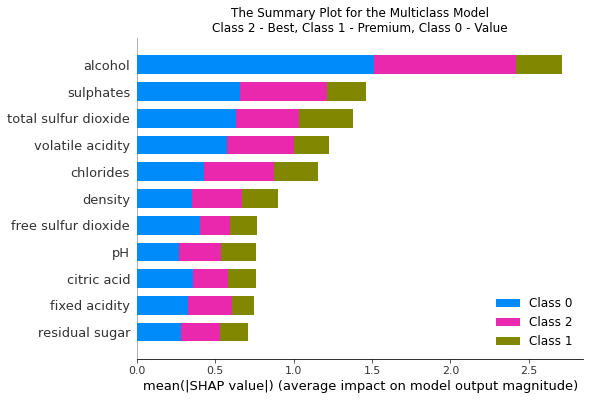

In [30]:
import shap
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test,approximate=True)
plt.title('The Summary Plot for the Multiclass Model'+'\n'+'Class 2 - Best, Class 1 - Premium, Class 0 - Value')
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [31]:
np.shape(shap_values) # Three classes, 320 observations, 11 variables 

(3, 320, 11)

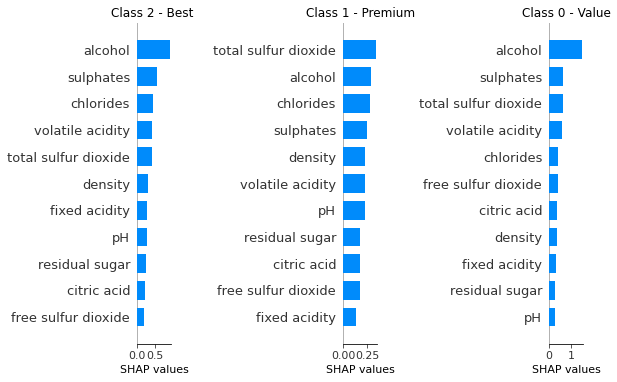

In [32]:
fig = plt.figure(figsize=(20,10))

ax0 = fig.add_subplot(131)
ax0.title.set_text('Class 2 - Best ')
shap.summary_plot(shap_values[2], X_test, plot_type="bar", show=False)
ax0.set_xlabel(r'SHAP values', fontsize=11)
plt.subplots_adjust(wspace = 5)

ax1 = fig.add_subplot(132)
ax1.title.set_text('Class 1 - Premium')
shap.summary_plot(shap_values[1], X_test, plot_type="bar", show=False)
plt.subplots_adjust(wspace = 5)
ax1.set_xlabel(r'SHAP values', fontsize=11)

ax2 = fig.add_subplot(133)
ax2.title.set_text('Class 0 - Value')
shap.summary_plot(shap_values[0], X_test, plot_type="bar", show=False)
ax2.set_xlabel(r'SHAP values', fontsize=11)

# plt.tight_layout(pad=3) # You can also use plt.tight_layout() instead of using plt.subplots_adjust() to add space between plots
plt.show()

### (4.2) Local interpretability  <a class="anchor" id="section42"></a>

In [33]:
np.shape(explainer.shap_values(X_test)[0])

(320, 11)

In [34]:
X_test.iloc[0,:]

fixed acidity           7.7000
volatile acidity        0.6600
citric acid             0.0400
residual sugar          1.6000
chlorides               0.0390
free sulfur dioxide     4.0000
total sulfur dioxide    9.0000
density                 0.9962
pH                      3.4000
sulphates               0.4700
alcohol                 9.4000
Name: 688, dtype: float64

In [35]:
expected_value = explainer.expected_value
expected_value

[-0.5458946, 0.81547856, 0.91307276]

In [36]:
multiclass = 1
#explainer = shap.TreeExplainer(xgb_model)
expected_value = np.round(explainer.expected_value,2)
expected_value = expected_value[multiclass]
print(f"Explainer expected value: {expected_value}")

Explainer expected value: 0.8199999928474426


In [37]:
shap_values = explainer.shap_values(X_test)[0][0,:]
shap_values

array([-0.13573973, -0.4231173 ,  0.00778953, -0.39816394,  0.03246046,
       -0.50252926,  0.7328801 , -0.223097  , -0.11801936, -1.0896944 ,
       -2.4062464 ], dtype=float32)

In [38]:
shap_values = explainer.shap_values(X_test)[1][0,:]
shap_values

array([-0.00322044, -0.31852797, -0.38067293,  0.06680878,  1.1197389 ,
       -0.04123633, -0.33313197, -0.5843111 , -0.14421405, -1.1047586 ,
       -0.31988916], dtype=float32)

In [39]:
shap_values = explainer.shap_values(X_test)[2][0,:]
shap_values

array([-0.10311073,  0.36351785,  0.2900366 ,  0.01016233, -0.65782166,
        0.39869937, -0.26327628,  0.21393076,  0.13501751,  0.7524373 ,
        0.9807475 ], dtype=float32)

Explainer expected value: -0.5458946228027344


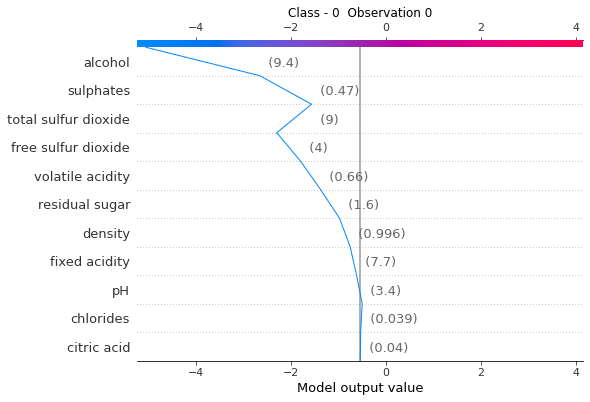

In [40]:
def multiclass_local_decision_plot(multiclass,j):
    expected_value = explainer.expected_value
    expected_value = expected_value[multiclass]
    print(f"Explainer expected value: {expected_value}")
    plt.title('Class - ' + str(multiclass)  + '  Observation ' + str(j))
    shap_values = explainer.shap_values(X_test)[multiclass][j,:]
    shap.decision_plot(expected_value, shap_values, X_test.iloc[j,:],show=False)

# Class 0 - Value
multiclass_local_decision_plot(0,0)    

Explainer expected value: 0.8154785633087158


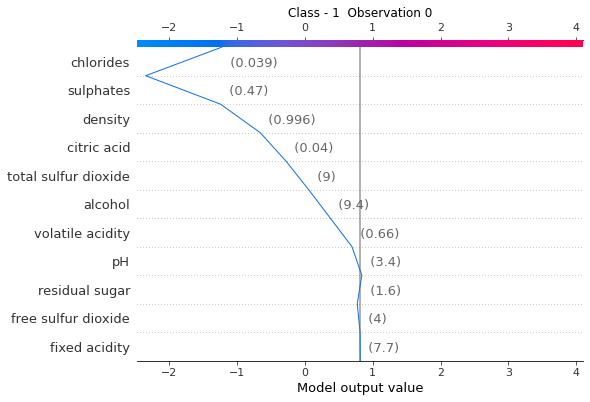

In [41]:
# Class 1 - Premium
multiclass_local_decision_plot(1,0)  

Explainer expected value: 0.9130727648735046


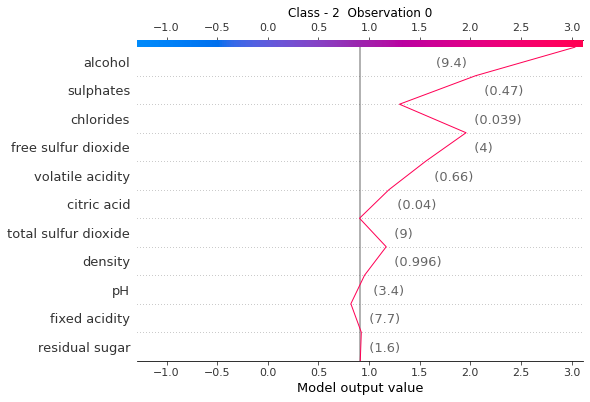

In [42]:
# Class 2 - Best
multiclass_local_decision_plot(2,0)  

Explainer expected value: -0.5458946228027344
Explainer expected value: 0.8154785633087158
Explainer expected value: 0.9130727648735046


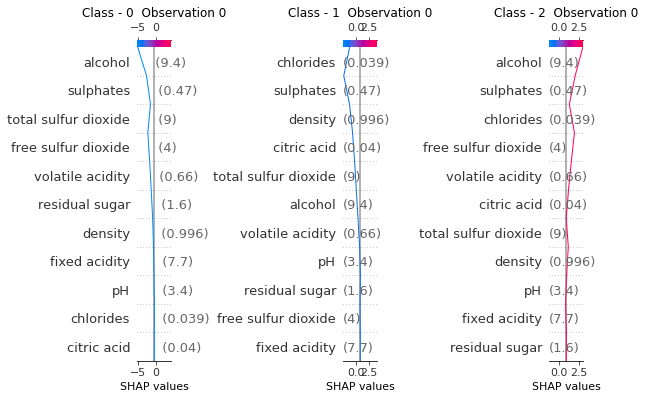

In [43]:
fig = plt.figure(figsize=(25,10))

ax0 = fig.add_subplot(131)
ax0.title.set_text('The First Class')
multiclass_local_decision_plot(0,0)  
ax0.set_xlabel(r'SHAP values', fontsize=11)
plt.subplots_adjust(wspace = 5)

ax1 = fig.add_subplot(132)
ax1.title.set_text('The Second Class')
multiclass_local_decision_plot(1,0)  
plt.subplots_adjust(wspace = 5)
ax1.set_xlabel(r'SHAP values', fontsize=11)

ax2 = fig.add_subplot(133)
ax2.title.set_text('The Third Class')
multiclass_local_decision_plot(2,0)  
ax2.set_xlabel(r'SHAP values', fontsize=11)

# plt.tight_layout(pad=3) # You can also use plt.tight_layout() instead of using plt.subplots_adjust() to add space between plots
plt.show()

In [44]:
def p(multiclass,j):    
    shap_values = explainer.shap_values(X_test)[multiclass]
    print(np.sum(shap_values[j,:]) )
    return(shap.force_plot(explainer.expected_value[multiclass], shap_values[j,:] , X_test.iloc[j,:]) )

# Class 0 - Value
p(0,0)

-4.5234776


In [45]:
# Class 1 - Premium
p(1,0)

-2.0434148


In [46]:
# Class 2 - Best
p(2,0)

2.1203406
